# Importing the Classes

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import scipy.misc
from skimage import transform
import warnings

warnings.filterwarnings("ignore")
from skimage.transform import resize as imresize
#convertering list of training data paths to df
train_dir = "D:\\PGPML\\Labs\\Projects\\2 June 2019\\train\\"
train_list = os.listdir(train_dir)
records = []


C:\Users\neeha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Adding the X Features and Y Categories for all records

In [3]:
for category in train_list:
    img_list = os.listdir(train_dir + category)
    for img in img_list:
        records.append((img,category))
        #img = imresize(img, (51, 51, 3))
df_train = pd.DataFrame.from_records(records,columns=['image','category'])

print(df_train.head(500))

             image     category
0    0050f38b3.png  Black-grass
1    0183fdf68.png  Black-grass
2    0260cffa8.png  Black-grass
3    05eedce4d.png  Black-grass
4    075d004bc.png  Black-grass
5    078eae073.png  Black-grass
6    082314602.png  Black-grass
7    0ace21089.png  Black-grass
8    0b228a6b8.png  Black-grass
9    0b3e7a7a9.png  Black-grass
10   0bb75ded8.png  Black-grass
11   0be707615.png  Black-grass
12   0c67c3fc3.png  Black-grass
13   0d1a9985f.png  Black-grass
14   0d28c429b.png  Black-grass
15   0d4f74f4a.png  Black-grass
16   0dad57e7f.png  Black-grass
17   0e91f92a1.png  Black-grass
18   0fe440ed5.png  Black-grass
19   1276dffba.png  Black-grass
20   129c51855.png  Black-grass
21   13a7f553a.png  Black-grass
22   14719a83e.png  Black-grass
23   1576ce9fd.png  Black-grass
24   163c13912.png  Black-grass
25   163e571a6.png  Black-grass
26   16c69a6d8.png  Black-grass
27   173cec485.png  Black-grass
28   1a125880e.png  Black-grass
29   1af1eddd3.png  Black-grass
..      

In [87]:
df_train.dtypes

image       object
category    object
dtype: object

In [88]:
print('Train Data', len(df_train.index))


Train Data 4726


In [89]:
print('categories',os.listdir(train_dir))


categories ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [90]:
print('# of categories', len(os.listdir(train_dir)))

# of categories 12


In [5]:
df_train.columns

Index(['image', 'category'], dtype='object')

## Resizing images and dropping bad images 

In [15]:
dim_image = []
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    data = img.size
    dim_image.append(data[0])
print('smallest image dimension', min(dim_image))

i_height = min(dim_image)
i_width = min(dim_image)

X = []
count = 0
bad_images = []
#df_train = df_train.drop(df_train.index[bad_images])
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    img.load()
    img = np.asarray(img, dtype='float32')
    img = img/255
    data = transform.resize(img,(49,49))
    if data.size != 7203:
        bad_images.append(count)
#     plt.imshow(data)
#     plt.show()
#     X.append(data)
    count += 1
print('bad images',bad_images)

df_train = df_train.drop(df_train.index[bad_images])
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    img.load()
    img = np.asarray(img, dtype='float32')
    img = img/255
    data = transform.resize(img,(49,49))
    X.append(data)

X = np.array(X)

y = np.array(df_train['category'].astype('category').cat.codes)

print('Done creating X and y.')
print('X Shape',X.shape)


smallest image dimension 49
bad images [119, 167, 178, 2254, 2275, 2301, 2381, 2390, 2420, 2479, 2541, 2557, 2566, 2596, 2598, 2655, 2685, 2693, 2724, 2780, 2788, 2825, 2834, 2871]
Done creating X and y.
X Shape (4726, 49, 49, 3)


# Splitting the Data into Training and Validation/Test

In [51]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from tensorflow.python.keras import utils


In [35]:
y_train = utils.to_categorical(y_train, 12)
y_test = utils.to_categorical(y_test, 12)

In [57]:
y = np.array(df_train['category'].astype('category').cat.codes)

In [58]:
y

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int8)

# Initializing & building the model 

In [59]:
import keras

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

im_shape = (49,49,3)
batch_size = 10

cnn  = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=im_shape, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2,2), padding='same'),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(12, activation='softmax')
])

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

cnn. fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 3780 samples, validate on 946 samples
Epoch 1/10
3780/3780 [==============================] - 21s 6ms/step - loss: 1.9849 - acc: 0.3082 - val_loss: 1.2074 - val_acc: 0.5592
Epoch 2/10
3780/3780 [==============================] - 22s 6ms/step - loss: 1.0398 - acc: 0.6458 - val_loss: 1.1896 - val_acc: 0.5930
Epoch 3/10
3780/3780 [==============================] - 21s 5ms/step - loss: 0.7773 - acc: 0.7426 - val_loss: 0.7798 - val_acc: 0.7093
Epoch 4/10
3780/3780 [==============================] - 19s 5ms/step - loss: 0.6272 - acc: 0.7878 - val_loss: 0.6970 - val_acc: 0.7600
Epoch 5/10
3780/3780 [==============================] - 21s 5ms/step - loss: 0.4875 - acc: 0.8405 - val_loss: 0.6759 - val_acc: 0.7833
Epoch 6/10
3780/3780 [==============================] - 22s 6ms/step - loss: 0.3950 - acc: 0.8669 - val_loss: 0.7232 - val_acc: 0.7590
Epoch 7/10
3780/3780 [==============================] - 21s 6ms/step - loss: 0.3327 - acc: 0.88

## Optimizing the Model by using image generator to increase the number of images for increasing accuracy

In [17]:
from keras.preprocessing.image import ImageDataGenerator #performs realtime image augmentation 

In [21]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images
#helps managing memory, less memory needed...but only use if there is less data...

In [22]:
# Prepare the generator
datagen.fit(X_train)

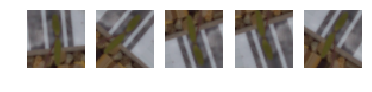

In [23]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [67]:
training_set = datagen.flow(X_train,y_train,batch_size = 32)

In [68]:
test_set = datagen.flow(X_test,y_test, batch_size = 32)

In [69]:
cnn.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 10,
                         validation_data = test_set,
                         nb_val_samples = 2000)

Epoch 1/10
250/250 [==============================] - 110s 439ms/step - loss: 0.7923 - acc: 0.7445 - val_loss: 0.7635 - val_acc: 0.7419
Epoch 2/10
250/250 [==============================] - 115s 461ms/step - loss: 0.6265 - acc: 0.7911 - val_loss: 0.6272 - val_acc: 0.7803
Epoch 3/10
250/250 [==============================] - 109s 437ms/step - loss: 0.5427 - acc: 0.8160 - val_loss: 0.5963 - val_acc: 0.7938
Epoch 4/10
250/250 [==============================] - 109s 434ms/step - loss: 0.4821 - acc: 0.8326 - val_loss: 0.5575 - val_acc: 0.8034
Epoch 5/10
250/250 [==============================] - 117s 467ms/step - loss: 0.4410 - acc: 0.8470 - val_loss: 0.4942 - val_acc: 0.8288
Epoch 6/10
250/250 [==============================] - 109s 436ms/step - loss: 0.4131 - acc: 0.8581 - val_loss: 0.4575 - val_acc: 0.8369
Epoch 7/10
250/250 [==============================] - 111s 446ms/step - loss: 0.3834 - acc: 0.8636 - val_loss: 0.5100 - val_acc: 0.8182
Epoch 8/10
250/250 [============================

In [71]:
Metrics=cnn.evaluate(X_test,y_test)
print("Loss and Accuracy is", Metrics)

946/946 [==============================] - 1s 1ms/step
Loss and Accuracy is [0.3696305596173188, 0.8752642701090516]


In [83]:
y_pred_train=cnn.predict_classes(x=X_train)

In [ ]:
y_train

In [84]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(y_train,y_pred_train))

0.9388888888888889


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.48      0.61       196
           1       0.95      0.98      0.97       313
           2       0.99      0.89      0.93       228
           3       0.99      0.98      0.98       487
           4       0.93      0.93      0.93       180
           5       0.95      0.99      0.97       387
           6       0.85      0.93      0.89       497
           7       0.94      0.98      0.96       185
           8       0.91      0.98      0.94       421
           9       0.95      0.96      0.95       192
          10       0.99      0.98      0.99       393
          11       0.98      0.97      0.97       301

   micro avg       0.94      0.94      0.94      3780
   macro avg       0.94      0.92      0.92      3780
weighted avg       0.94      0.94      0.94      3780



In [73]:
y_pred_class=cnn.predict_classes(x=X_test)

In [80]:
y_test

array([10,  6,  4,  7,  3,  3,  3, 10,  3,  8, 10, 11,  5,  6,  3,  5,  3,
       10,  1, 10,  2,  6,  6,  5,  8,  3,  2,  3, 10,  4,  1,  7,  5,  3,
        3,  3, 10,  0,  8,  5,  1, 10, 11,  6,  3,  1,  8,  6,  8,  5,  6,
        6, 11,  6,  5,  9,  0,  2,  8,  6,  8, 11,  5,  6,  6,  6,  3, 11,
       11, 10,  6,  6,  1,  6, 10,  2,  2,  8,  3,  6, 10,  0,  7,  2,  8,
        8,  1,  3,  2,  0,  6,  1,  8,  1,  4,  3,  3,  3,  5,  6,  6,  5,
        4,  3,  6,  6, 11, 10,  1,  9,  1,  0, 10,  6,  0,  1,  5,  7,  9,
        6,  6,  5,  8,  6,  6,  2,  5, 10,  1, 10,  6,  1,  4,  3,  1,  1,
        4,  6, 11,  6,  6,  7,  6,  1,  1,  6,  0,  5,  3, 10,  6,  3,  3,
        3, 11,  1,  4,  6,  8,  1,  3, 11,  8, 11,  8, 11, 11,  2,  2,  8,
        1,  6, 11,  0,  2, 10,  3,  6, 10,  8, 10,  0,  3,  8,  8,  5,  9,
        0,  2,  5,  6,  3,  3,  5,  2,  3,  5,  8,  0,  6,  3,  3,  2,  0,
        0,  3,  0,  1,  8,  3,  5,  4,  2,  3, 11,  1,  3,  9,  0,  6,  9,
       11,  8,  1,  6,  3

In [76]:
y_pred_class

array([10,  8,  4,  7,  3,  3,  3, 10,  3,  8, 10, 11,  5,  6,  3,  5,  3,
       10,  1, 10,  2,  6,  6,  5,  8,  3,  2,  3, 10,  4,  9,  7,  5,  3,
        3,  7, 10,  0,  8,  5,  1, 10, 11,  6,  3,  1,  8,  4,  8,  5,  6,
        6, 11,  8,  5,  9,  0,  7,  8,  6,  8, 11,  5,  6,  6,  5,  3, 11,
       11, 10,  6,  6,  1,  6, 10,  2,  2,  8,  3,  6, 10,  6, 11,  5,  8,
        8,  1,  3,  2,  8,  6,  1,  8,  1,  4,  3,  3,  3,  5,  0,  6,  5,
        4,  3,  6,  6, 11, 10,  8,  9,  1,  6, 10,  6,  6,  1,  5,  7,  8,
        6,  6,  5,  8,  6,  6,  2,  5, 10,  1, 10,  6,  1,  7,  3,  1,  1,
        4,  6, 11,  6,  6,  7,  6,  1,  1,  0,  6,  5,  3, 10,  6,  3,  3,
        3, 11,  1,  4,  6,  8,  1,  3, 11,  8, 11,  8, 11, 11,  2,  2,  8,
        1,  6,  5,  0,  2, 10,  3,  6, 10,  8, 10,  0,  3,  8,  8,  5,  9,
        6,  1,  5,  6,  3,  3,  5,  5,  3,  5,  8,  0,  6,  3,  9,  2,  6,
        0,  3,  6,  1,  8,  3,  5,  4,  2,  3, 11,  1,  3,  9,  6,  6,  9,
       11,  8,  1,  6,  3

In [81]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(y_test,y_pred_class))

0.8752642706131079


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.61      0.34      0.44        64
           1       0.95      0.97      0.96        77
           2       0.96      0.85      0.90        59
           3       0.97      0.93      0.95       124
           4       0.94      0.78      0.85        41
           5       0.91      0.97      0.94        88
           6       0.76      0.85      0.80       136
           7       0.73      0.92      0.81        36
           8       0.84      0.95      0.89        95
           9       0.76      0.90      0.82        39
          10       1.00      0.96      0.98       103
          11       0.91      0.92      0.91        84

   micro avg       0.88      0.88      0.88       946
   macro avg       0.86      0.86      0.86       946
weighted avg       0.87      0.88      0.87       946



# The Validation/Test Accuracy here is 87% where as the accuracy for Train data is 93% so this seems to be a good overall accuracy